In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
plt.style.use("dark_background")
plt.rcParams['axes.labelsize'] = '14'

data = pd.read_csv("../data/pilot0/participant_2_20210601_1012.csv", sep="\t")
data["p_go_decision"] = data.decision == "go"
data = data.join(pd.DataFrame(data["a_condition"].str.strip("[]").str.split(",").to_list(), columns=["a_0", "a_1"]))
data = data.astype({"a_0": float, "a_1": float})

data = data[(data.RT>0) & (data.RT<2.5)]
data = data[data.tau_condition<100]

print(data)
print("Number of collisions: ", len(data[data.collision]))

     participant_id  d_condition  tau_condition   a_condition decision    RT  \
5                 2           60            3.5    [0.0, 4.0]     stay  0.94   
6                 2           30            3.5    [4.0, 4.0]     stay  1.22   
7                 2           30            5.0    [4.0, 4.0]       go  0.92   
8                 2           60            3.5    [0.0, 0.0]     stay  0.82   
9                 2           30            3.5   [0.0, -2.0]       go  1.14   
..              ...          ...            ...           ...      ...   ...   
432               2           60            3.5   [0.0, -2.0]       go  1.54   
433               2           30            3.5   [0.0, -2.0]       go  1.48   
434               2           30            3.5  [-2.0, -2.0]       go  1.62   
435               2           30            3.5    [4.0, 4.0]     stay  1.42   
436               2           30            5.0    [0.0, 0.0]       go  0.94   

     collision  p_go_decision  a_0  a_1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the catplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: object of type 'NoneType' has no len()

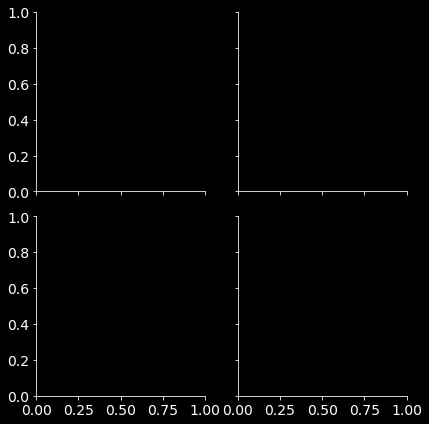

In [86]:
g = sns.FacetGrid(data, col="tau_condition", row="d_condition", hue="a_1", margin_titles=True)
g.map(sns.regplot, "a_0", "p_go_decision", logistic=True, ci=None)
g.add_legend()

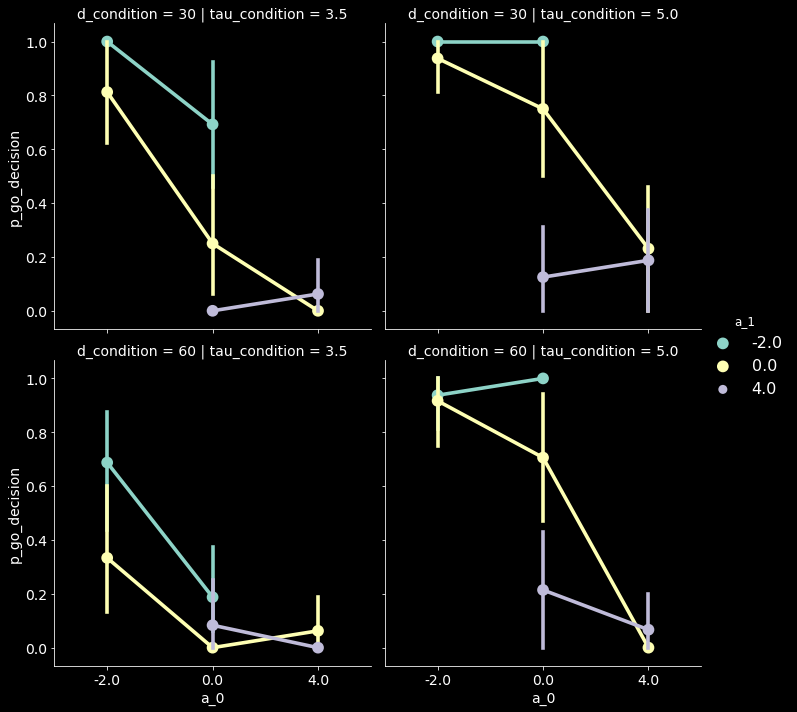

In [93]:
sns.catplot(data=data, x="a_0", y="p_go_decision", row="d_condition", col="tau_condition", hue="a_1", kind="point")

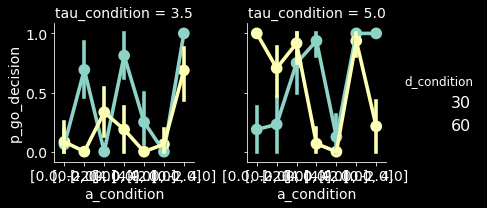

In [68]:
g = sns.FacetGrid(data, col="tau_condition", hue="d_condition", margin_titles=True)
g.map(sns.pointplot, "a_condition", "p_go_decision")
g.add_legend()

c:\users\nwmbeckers\repositories\cognitive-av\venv\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


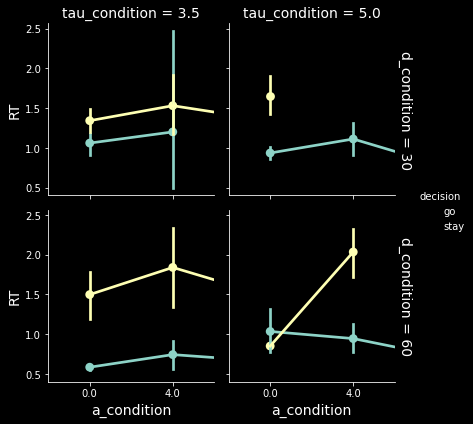

In [4]:
g = sns.FacetGrid(data, row="d_condition", col="tau_condition", hue="decision", margin_titles=True)
g.map(sns.pointplot, "a_condition", "RT")
g.add_legend()